<font color=darkcyan>
<font size =5>
Problem Definition

<font color= black>
<font size =2.5>
    
  Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

<font color=darkcyan>
<font size =5>
Objective

<font color=black>
<font size =2.5>
    
    
Given a Bank customer, 
      
1. To identify different aspects of the service that influence customers to join other service providers.
2. Using EDA identify the churn patterns and provide insights about factors that affect customer's decision.
3. Build a neural network-based classifier that can determine whether customer will leave or not leave in the next 6 months and evaluate the performance metrics for the same.
4. Provide recommendations to management for improvement of cutomer service. So that we can retain more customers.

<font color=darkcyan>
<font size =5>
1.1 Installing and Loading all required packages and libraries

In [635]:
# Installing tensorflow 2.0 package
#!pip install tensorflow

In [636]:
# Check the version of tensorflow installation
import tensorflow as tf
print(tf.__version__)

2.6.0


In [637]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

# libaries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set()

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

# To use statistical functions
import scipy.stats as stats

# Tensorflow  Libraries
import tensorflow as tf
from sklearn import preprocessing

# Importing Keras
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
#from keras.optimizers import Adam

# Using Tensorflow Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam

# Libraries to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV

# to perform PCA
from sklearn.decomposition import PCA


<font color=darkcyan>
<font size =5>
1.2 Importing the Data Set

In [638]:
#Import the data set
data =pd.read_csv("bank.csv") 

In [639]:
# copying data to another variable to avoid any changes to original data
bank_churn = data.copy()

<font color=darkcyan>
<font size =5>
1.3 Structural Overview of the Data Set

<font color=darkorange>
<font size =4.5>
1.3.1 Viewing the first 10 and last 10 rows of the Data Set

In [640]:
bank_churn.head(10)# Read top 10 values of the data set

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [641]:
bank_churn.tail(10)# Read bottom 10 values of the data set

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


<font color = 'green'>
<font size =1 >
# Observations : 
The dataset looks clean and consistent with the description provided.

<font color=darkorange>
<font size =4.5>
1.3.2 Data columns of the given Data Set

In [642]:
bank_churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

<font color = 'green'>
<font size =1 >
# Observations : 
The dataset consists of the above 14 columns.

<font color=darkorange>
<font size =4.5>
1.3.3 Checking the data shape

In [643]:
bank_churn.shape #shape of dataset

(10000, 14)

<font color = 'green'>
<font size =1 >
# Observations : 
We have 10000 rows and 14 columns

<font color=darkorange>
<font size =4.5>
1.3.4 Checking the detailed information of the columns like data type, count, etc.

In [644]:
bank_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >

1. There are appear to be no missing values in the given data set.
2. RowNumber is a redundant serial number, hence has no value for analysis and can be removed.
3. CustomerId is given as integer value. Since this appears to be unique value to identifying a customer we can convert it to categorical variable for evaluation.
4. Surname, Geography and Gender appear to be correctly denoted as categorical variable.
5. CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary look like are correctly denoted as integer types.
6. HasCrCard, IsActiveMember, Exited are denoted as integer values but need to be evaluated as boolean or categorical as they are 0,1 representing yes and no values.

<font color=darkorange>
<font size =4.5>
1.3.5 Checking for null values in the entire data set

In [645]:
bank_churn.isnull().values.any() # If there are any null values in data set

False

In [646]:
# Check for null values in the data each column
bank_churn.isnull().sum().sort_values(ascending=False)

Exited             0
EstimatedSalary    0
IsActiveMember     0
HasCrCard          0
NumOfProducts      0
Balance            0
Tenure             0
Age                0
Gender             0
Geography          0
CreditScore        0
Surname            0
CustomerId         0
RowNumber          0
dtype: int64

<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >
There are no missing values in the given data set.

<font color=darkorange>
<font size =4.5>
1.3.6 Summary of the Data Set

In [647]:
# Detailed summary of the data set
bank_churn.describe(include = 'all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >

1. RowNumber is a redundant column and can be deleted. 
2. Customer Id can also be checked for repeating values and deleted for EDA evaluation.
3. Surname also doesnot provide any useful information regarding customer churn hence can be removed from EDA evaluation.
4. Credit score varies from a in of 350 to a max of 850. Mean and median are almost similar. Hence data is not skewed.
5. Maximum customers belong to geographical location of France and maximum are Male. 
6. Age of customers varies from 18 to 92. Data doenot appear to be skewed.
7. Customer Tenure with bank varies from 0 to 10 years. No skew.
8. Account Balance varies from 0 to 250000 approx. Data appears left skewed .
9. Number of products of the bank each customer has varies fro 1 to 4. 
10. Estimated salary varies from 11.58 to almost 200000. No skew.

<font color=darkcyan>
<font size =5>
1.4 Fixing The Data Types

<font color=darkorange>
<font size =4.5>
1.4.1 Changing bool and object to categorical type

In [648]:
## Converting the data type 

cat_cols = [ 'HasCrCard', 'IsActiveMember', 'CustomerId', 'RowNumber' , 'Geography', 'Gender', 'Exited' ]
bank_churn[cat_cols] = bank_churn[cat_cols].astype('category')
bank_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   RowNumber        10000 non-null  category
 1   CustomerId       10000 non-null  category
 2   Surname          10000 non-null  object  
 3   CreditScore      10000 non-null  int64   
 4   Geography        10000 non-null  category
 5   Gender           10000 non-null  category
 6   Age              10000 non-null  int64   
 7   Tenure           10000 non-null  int64   
 8   Balance          10000 non-null  float64 
 9   NumOfProducts    10000 non-null  int64   
 10  HasCrCard        10000 non-null  category
 11  IsActiveMember   10000 non-null  category
 12  EstimatedSalary  10000 non-null  float64 
 13  Exited           10000 non-null  category
dtypes: category(7), float64(2), int64(4), object(1)
memory usage: 1.4+ MB


<font color = 'green'>
<font size =1 >
# Observations : 
All boolean and object columns are now converted to categorical columns.

<font color=darkorange>
<font size =4.5>
1.4.2 Removing redundant column "Row number"

In [649]:
# Drop Sl_No column
bank_churn.drop(["RowNumber"], axis=1, inplace=True)
bank_churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<font color = 'green'>
<font size =1 >
# Observations : 
Row number column is dropped. Now we have 13 columns to evaluate.

<font color=darkorange>
<font size =4.5>
1.4.3 Checking Unique value in each column

In [650]:
# Unique category in each coulmn
for i in bank_churn.columns:
    print(bank_churn[i].value_counts())
    print("*" * 50)

15815690    1
15649211    1
15649379    1
15649359    1
15649354    1
           ..
15732265    1
15732235    1
15732202    1
15732199    1
15565701    1
Name: CustomerId, Length: 10000, dtype: int64
**************************************************
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Vidler       1
O'Connor     1
Mackey       1
Ohearn       1
Oster        1
Name: Surname, Length: 2932, dtype: int64
**************************************************
850    233
678     63
655     54
705     53
667     53
      ... 
419      1
417      1
373      1
365      1
401      1
Name: CreditScore, Length: 460, dtype: int64
**************************************************
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************
37    478
38    477
35    474
36    4

<font color = 'green'>
<font size =1 >
# Observations 


<font color = 'green'>
<font size =1 >


1.`CustomerId` column doesnot have any repeated customers hence no duplicate entries.As it is a unique number representing each customer hence can be deleted as it has no contribution to EDA.    
2. `Surname` : Last name of customer has no valuable information regarding the churn rate of the customer hence is a unique customer rate and can be eliminated.
    
3. `CreditScore` : Many customers have 850 credit score i.e. almost 233 customers. Values need to be binned in categories for further evaluation.
4. `Geography` : Customers have 3 geographical locations, i.e., `France`, `Spain`, `Germany`. France has maximum customers with 5014 customers from there.
5. `Gender` : Maximum customers are Male i.e. 5457 customers.
6. `Age` : Age of the customer is too varied ranging from 18 to 92. Needs binning for further evaluation.
7. `Tenure`: Customer tenure with bank varies from 0 to 10 years. Maximum customers with bank have been for 1 or 2 years. Needs further evaluation.
8. `Balance` : Balance needs binning for evaluation as it is too varied. Almost 3600 plus customers have zero account balance. this issue needs to be addresed and evaluated further.
9. `NumOfProducts` : Most customers have 1 product with bank.
10. `HasCrCard`: Almost 7055 customers that is maximum customers have credit cards with the bank.
11. `IsActiveMember` : Maximum customers are active members and are regularly using bank services.
12. `EstimatedSalary` : Too varied data, needs binning for further evaluation.
13. `Exited` : Maximum customers have not exited More than 7900 customers out of 10000 have stayed with the bank. As this is our target variable we need to address the issue of biased data in our future evaluations.

<font color=darkorange>
<font size =4.5>
1.4.4 Eliminating unique variable column "Customer ID" and "Surname"

In [651]:
# Drop Sl_No column
bank_churn.drop(["CustomerId", "Surname"], axis=1, inplace=True)
bank_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<font color = 'green'>
<font size =1 >
# Observations : 
"Customer ID" and "Surname" columns are dropped. Now we have 11 columns to evaluate.

<font color=darkorange>
<font size =4.5>
1.4.5 Summary of the Data Set

In [652]:
bank_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


In [653]:
bank_churn.describe(include=['category']).T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457
HasCrCard,10000,2,1,7055
IsActiveMember,10000,2,1,5151
Exited,10000,2,0,7963


<font color=darkcyan>
<font size =5>
1.5 Univariate Analysis

In [654]:
churn_uni = bank_churn.copy()

<font color=darkorange>
<font size =4.5>
1.5.1 Histogram of all the given columns

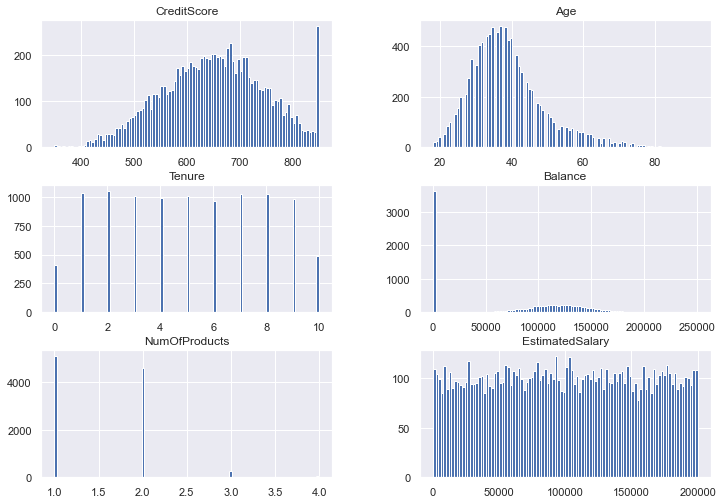

In [655]:
# Plotting a histogram of all numerical columns in the dataset
columns = list(churn_uni)# All columns in the data set
churn_uni[columns].hist(stacked=False, bins=100, figsize=(12,60), layout=(20,2)); # plot histogram

<font color=Green>
<font size =1>
# Observations 


<font color = 'green'>
<font size =1 >

1. Credit Score exceptionally high number of customers have score of 850 . Hence data appears skewed.
2. Age data is left skewed.
3. Tenure Other than 0 and 10 years being very less, all the rest of the years of tenure have almost a equal distribution of customers.
4.Balance an exceptionally large number of customers have 0 account balance, this is making it difficult to evaluate the rest of the data in this histogram.
5. Most customers appear to have 1 or 2 products. Very few customers have 3 or 4 products.
6. No of customers in each category of Estimated salary column appear to be almost equally distributed.
    

<font color=darkorange>
<font size =4.5>
1.5.2 Univariate analysis of numerical variables to study their central tendency and dispersion.

In [656]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency
# and dispersion.
#  Writing a function that will help us create boxplot and histogram for any input numerical
# variable.
# This function takes the numerical column as the input and returns the boxplots
# and histograms for the variable.


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="cyan"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.countplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        feature, kde=True, ax=ax_hist2,palette="winter"
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

<font color=darkorange>
<font size =4.5>
1.5.2.1 Boxplot and Histogram of CreditScore

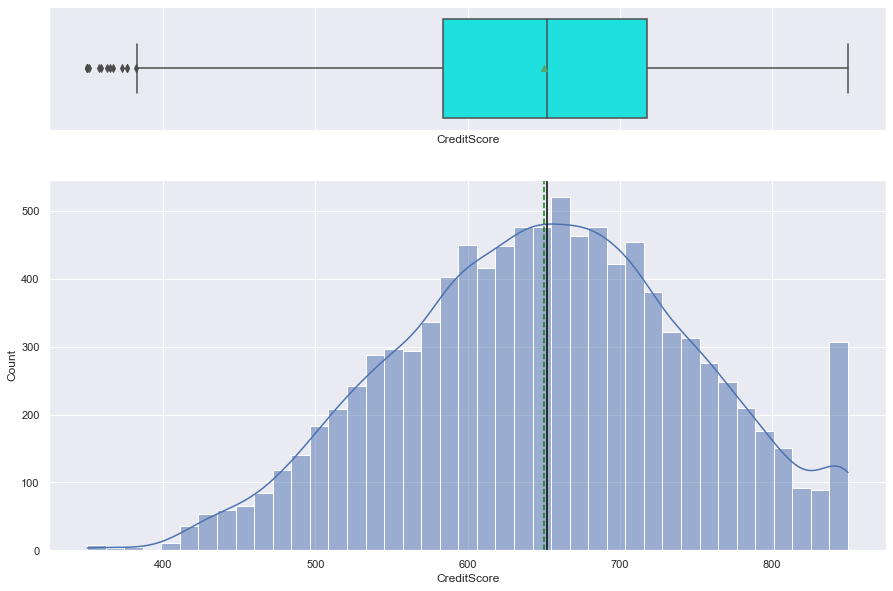

In [657]:
# Plotting Credit Score
histogram_boxplot(churn_uni['CreditScore'])

<font color=green>
<font size =1>
# Observations : 
    1) Too varied needs binning
    2) Max customers have 850 credit score
    3) Slightly left skewed data.

<font color=darkorange>
<font size =4.5>
1.5.2.2 Observation on Binned Credit Score

In [658]:
# Customer Age binned for better categorization
binned_cr_sc = pd.cut(churn_uni['CreditScore'], [-np.inf,580,670,740,800,np.inf])
binned_cr_sc.value_counts(dropna=False)
# Assigning labels to categories
churn_uni['CreditScore_bin'] = pd.cut(
    churn_uni['CreditScore'], [-np.inf,580,670,740,800,np.inf], 
    labels = [ "Poor", "Fair", "Good", "Very Good", "Exceptional"]
)

churn_uni['CreditScore_bin'].value_counts(dropna=False)

Fair           3350
Good           2397
Poor           2393
Very Good      1215
Exceptional     645
Name: CreditScore_bin, dtype: int64

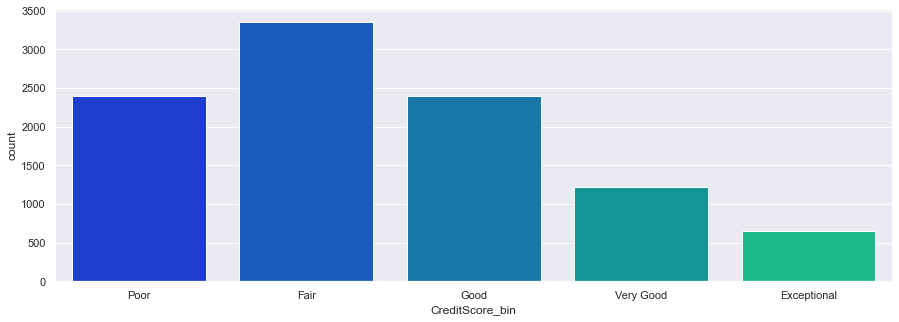

In [659]:
# Plotting a plot of Binned Customer Age for Existing and Attrited Customer.
plt.figure(figsize=(15,5))
ax=sns.countplot(x='CreditScore_bin', data= churn_uni, palette='winter') 

<font color=green>
<font size =1>
# Observations 


<font color = 'green'>

Most customers have a fair, poor and good credit score. Very few customers have a credit score exceptional credit score.


<font color=darkorange>
<font size =4.5>
1.5.2.3 Boxplot and Histogram of Age

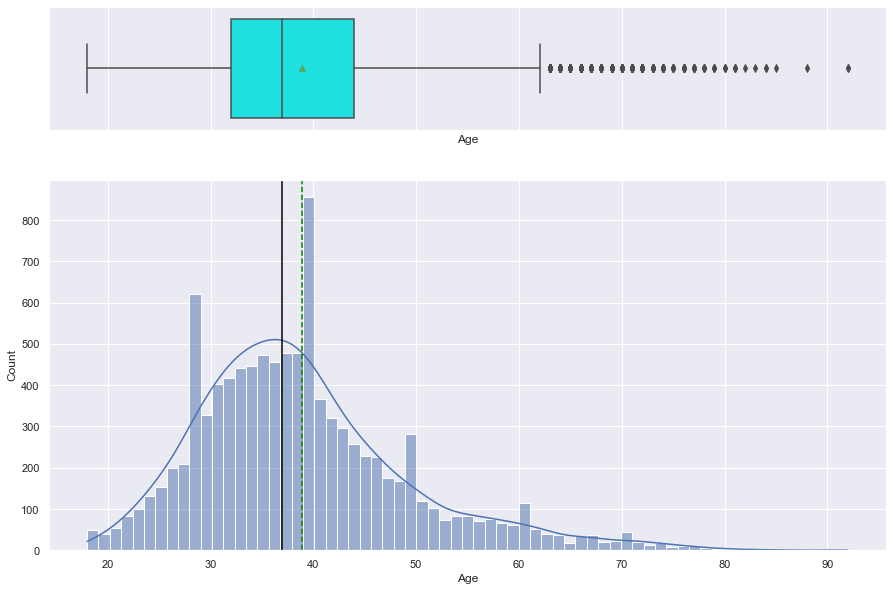

In [660]:
# Plotting Age
histogram_boxplot(churn_uni["Age"])

<font color=green>
<font size =1>
# Observations : 
    1) Right skew
    2) Spikes just before 30,40,50. After 60 and 70
    3) Most customers are in range 25 to 45
    4) Very less customers after the age of 65

<font color=darkorange>
<font size =4.5>
1.5.2.4 Boxplot and Histogram of Balance

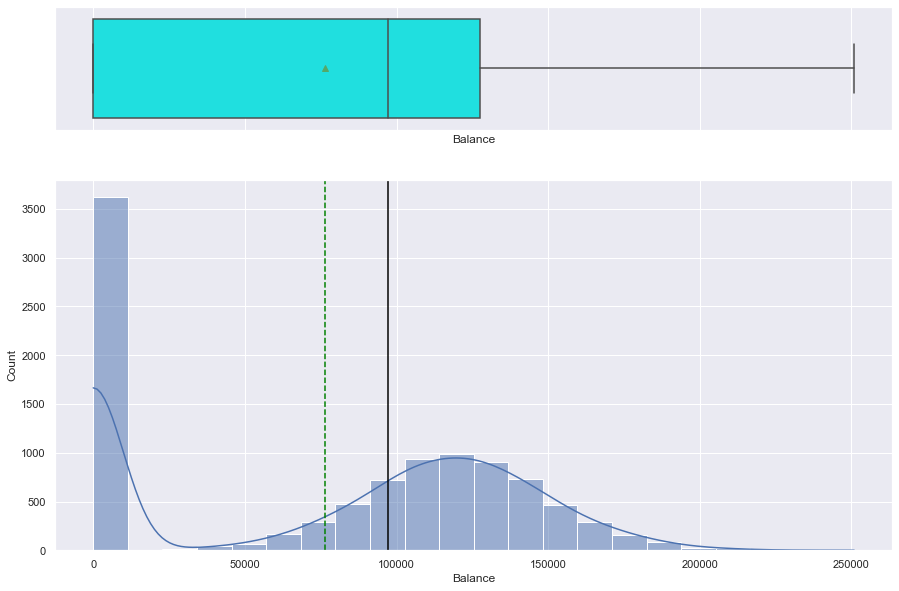

In [661]:
histogram_boxplot(churn_uni["Balance"])# Plotting Balance

<font color=green>
<font size =1>
# Observations : 
    1) Left skew.
    2) Almost 3500 plus customers have zero account balance.
    3) in the rest of the data most customers have balance of 100000 to 150000.

<font color=darkorange>
<font size =4.5>
1.5.2.5 Observation on Binned Balance

In [662]:
# Customer Age binned for better categorization
binned_bal = pd.cut(churn_uni['Balance'], [-np.inf,0,5000,10000,50000,100000,150000,200000,250000,np.inf])
binned_bal.value_counts(dropna=False)
# Assigning labels to categories
churn_uni['Balance_bin'] = pd.cut(
    churn_uni['Balance'], [-np.inf,0,5000,10000,50000,100000,150000,200000,250000,np.inf], 
    labels = [ "Zero", "0 to 5k", "5k to 10k", "10k to 50k", "50k to 100k", "100k to 150k", "150k to 200k", "200k to 250 k", "250k and above"]
)

churn_uni['Balance_bin'].value_counts(dropna=False)

100k to 150k      3830
Zero              3617
50k to 100k       1509
150k to 200k       935
10k to 50k          74
200k to 250 k       33
250k and above       1
0 to 5k              1
5k to 10k            0
Name: Balance_bin, dtype: int64

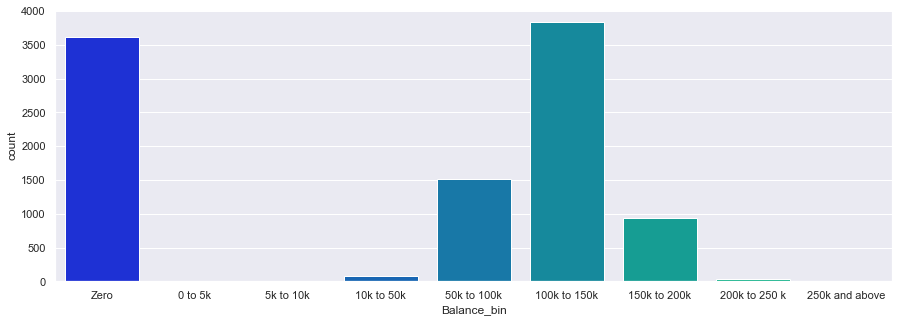

In [663]:
# Plotting a plot of Binned Customer Age for Existing and Attrited Customer.
plt.figure(figsize=(15,5))
ax=sns.countplot(x='Balance_bin', data= churn_uni, palette='winter') 

<font color=green>
<font size =1>
# Observations 


<font color = 'green'>
<font size =1>
Most customers have either zero or between 100k to 150k balance in account. Very few customers with 1 to 50k and more than 200k account balance.
    


<font color=darkorange>
<font size =4.5>
1.5.2.6 Boxplot and Histogram of EstimatedSalary

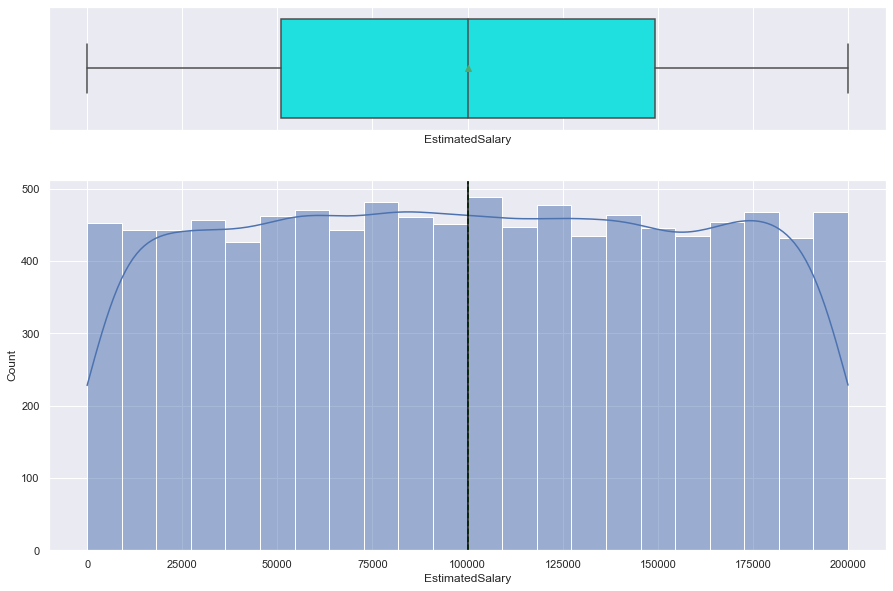

In [664]:
histogram_boxplot(churn_uni["EstimatedSalary"])# Plotting Estimated Salary

<font color=green>
<font size =1>
# Observations : Needs binning for further evaluation

<font color=darkorange>
<font size =4.5>
1.5.2.7 Observation on Binned EstimatedSalary

In [665]:
# Customer Age binned for better categorization
binned_sal = pd.cut(churn_uni['EstimatedSalary'], [-np.inf,50000,100000,150000,np.inf])
binned_sal.value_counts(dropna=False)
# Assigning labels to categories
churn_uni['EstimatedSalary_bin'] = pd.cut(
    churn_uni['EstimatedSalary'], [-np.inf,50000,100000,150000,np.inf], 
    labels = [ "Less than 50k", "50k to 100k", "100k to 150k", "150k and above"]
)

churn_uni['EstimatedSalary_bin'].value_counts(dropna=False)

100k to 150k      2555
50k to 100k       2537
150k and above    2455
Less than 50k     2453
Name: EstimatedSalary_bin, dtype: int64

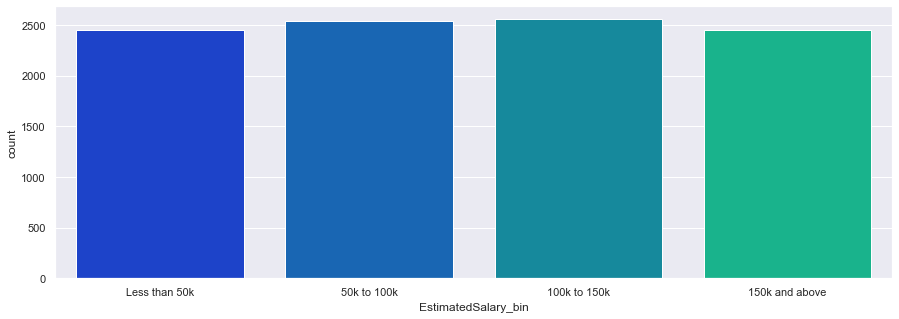

In [666]:
# Plotting a plot of Binned Customer Age for Existing and Attrited Customer.
plt.figure(figsize=(15,5))
ax=sns.countplot(x='EstimatedSalary_bin', data= churn_uni, palette='winter') 

<font color=green>
<font size =1>
# Observations 


<font color = 'green'>
<font size =1>
Each Salary category has almost equal number of customers
    


<font color=darkorange>
<font size =4.5>
1.5.3 Percentage analysis of each category.

In [667]:
# Function to create barplots that indicate percentage for each category.
def perc_on_bar(plot, feature):
    
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

<font color=darkorange>
<font size =4.5>
1.5.3.1 Percentage of customers by their Credit Score category

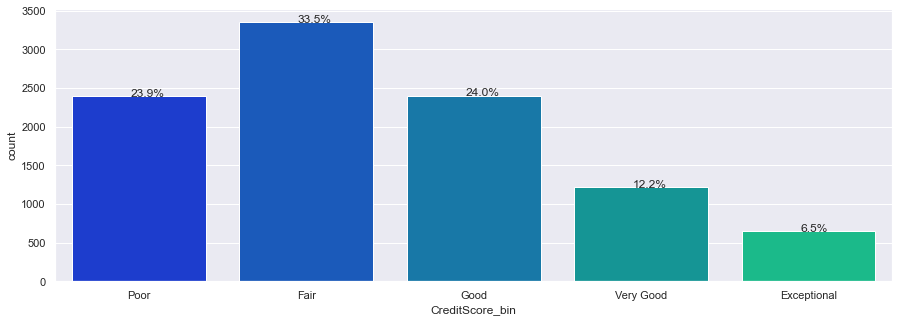

In [668]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    churn_uni["CreditScore_bin"],
    palette="winter",
    
)
perc_on_bar(ax, churn_uni["CreditScore_bin"])

<font color=green>
<font size = 1>
# Observations : 
Almost 33.5 % of customers have fair credit scores. Followed by  24% of Good score. Less than 7 % of total have a exceptional score.


<font color=darkorange>
<font size =4.5>
1.5.3.2 Percentage of customers by their Tenure with the bank

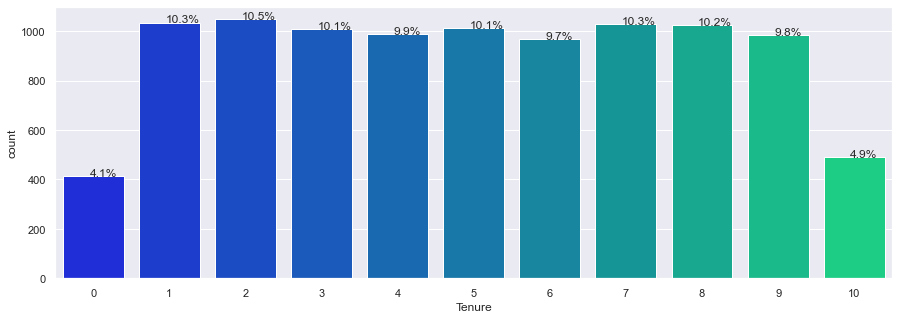

In [669]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    churn_uni["Tenure"],
    palette="winter",
    
)
perc_on_bar(ax, churn_uni["Tenure"])

<font color=darkorange>
<font size =4.5>
1.5.3.3 Percentage of customers by their Balance category

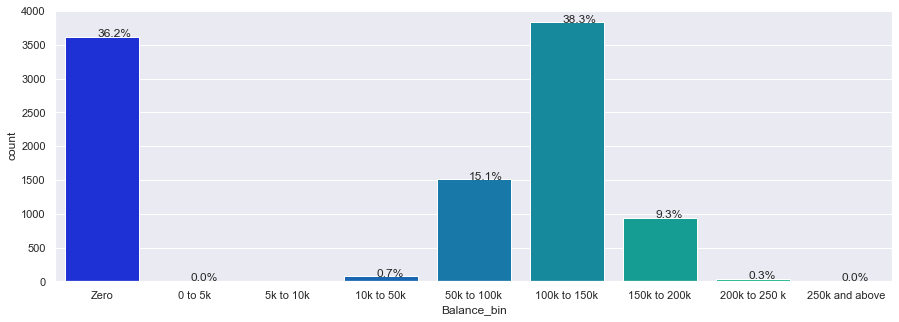

In [670]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    churn_uni["Balance_bin"],
    palette="winter",
    
)
perc_on_bar(ax, churn_uni["Balance_bin"])

<font color=green>
<font size = 1>
# Observations : 
36.2 % customers have zero account balance. 38.3 5 customers have account balance between 100k to 150k.


<font color=darkorange>
<font size =4.5>
1.5.3.4 Percentage of customers by their Number Of Products 

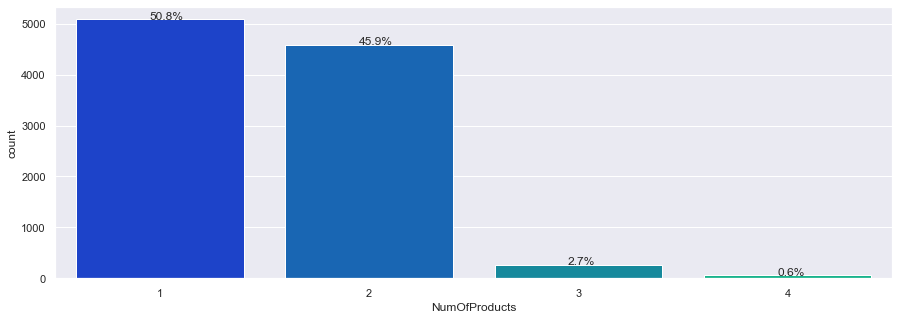

In [671]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    churn_uni["NumOfProducts"],
    palette="winter",
    
)
perc_on_bar(ax, churn_uni["NumOfProducts"])

<font color=green>
<font size = 1>
# Observations : 
50% of customers have 1 product with bank. Less than 3% have 3 or 4 products


<font color=darkorange>
<font size =4.5>
1.5.3.5 Percentage of customers by their Estimated Salary category

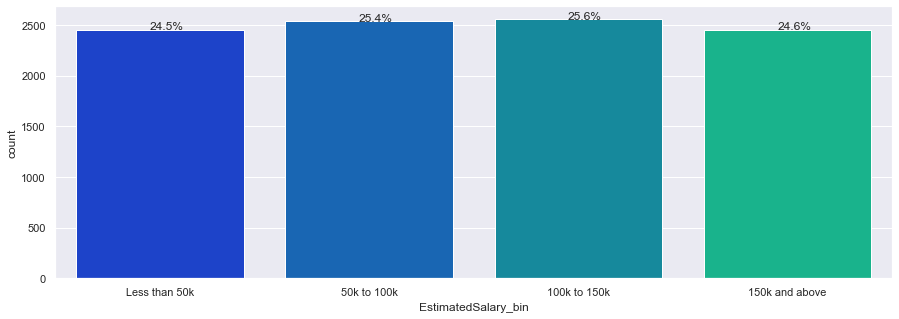

In [672]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    churn_uni["EstimatedSalary_bin"],
    palette="winter",
    
)
perc_on_bar(ax, churn_uni["EstimatedSalary_bin"])

<font color=darkorange>
<font size =4.5>
1.5.3.6 Percentage of customers by their Geography

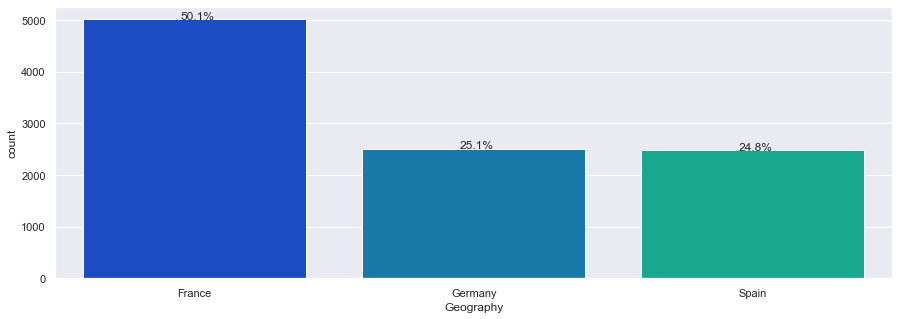

In [673]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    churn_uni["Geography"],
    palette="winter",
    
)
perc_on_bar(ax, churn_uni["Geography"])

<font color=green>
<font size = 1>
# Observations : 
50% of customers are from France, 25 % from Germany, and 24.8% from Spain.


<font color=darkorange>
<font size =4.5>
1.5.3.7 Percentage of customers by their Gender

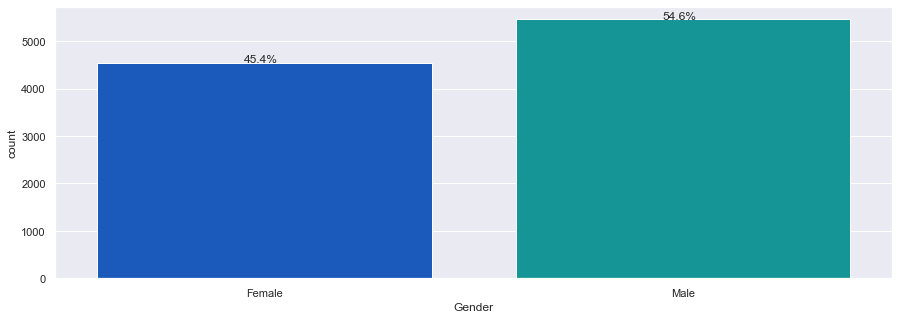

In [674]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    churn_uni["Gender"],
    palette="winter",
    
)
perc_on_bar(ax, churn_uni["Gender"])

<font color=green>
<font size = 1>
# Observations : 
54.6% customers are Male.


<font color=darkorange>
<font size =4.5>
1.5.3.8 Percentage of customers by possession of Credit Card

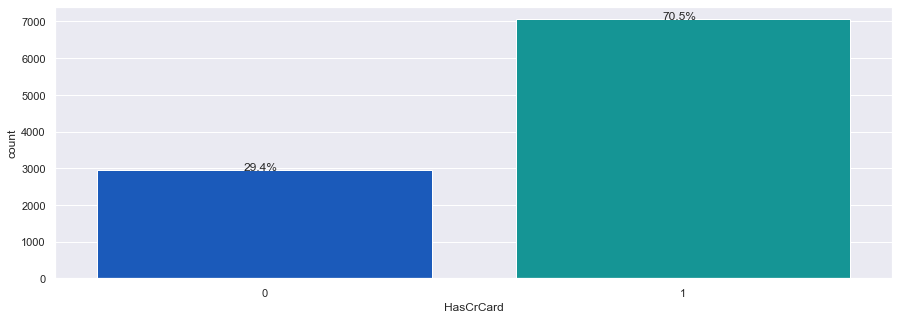

In [675]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    churn_uni["HasCrCard"],
    palette="winter",
    
)
perc_on_bar(ax, churn_uni["HasCrCard"])

<font color=green>
<font size = 1>
# Observations : 
 Almost 70% of customers have credit card.


<font color=darkorange>
<font size =4.5>
1.5.3.9 Percentage of customers grouped by if or not they use the bank services actively.

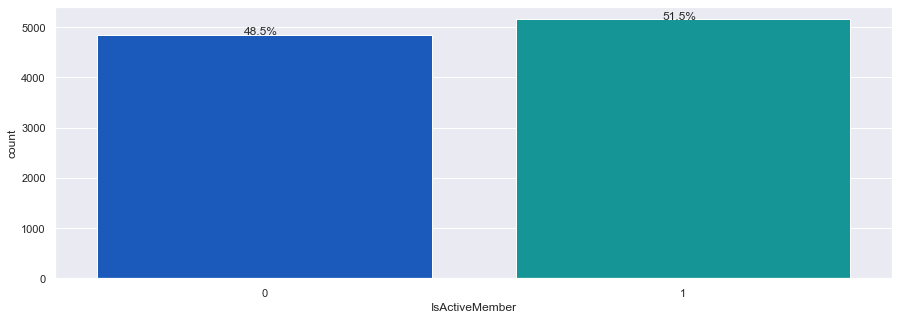

In [676]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    churn_uni["IsActiveMember"],
    palette="winter",
    
)
perc_on_bar(ax, churn_uni["IsActiveMember"])

<font color=green>
<font size = 1>
# Observations : 
51.5 % are active users whereas 48.5% are not active members.


<font color=darkorange>
<font size =4.5>
1.5.3.10 Percentage of customers grouped by if or not they left the bank.

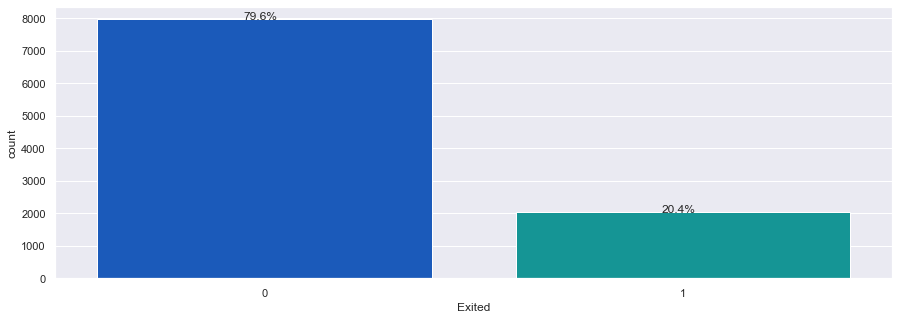

In [677]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(
    churn_uni["Exited"],
    palette="winter",
    
)
perc_on_bar(ax, churn_uni["Exited"])

<font color=green>
<font size = 1>
# Observations : 
Almost 80% didnt leave , whereas 20% left the bank.


<font color=darkcyan>
<font size =5>
1.6 Bivariate Analysis

In [678]:
bank_churn_bi = churn_uni.copy()

In [679]:
bank_churn_bi["Exited"] = bank_churn_bi["Exited"].astype('int64')
bank_churn_bi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CreditScore          10000 non-null  int64   
 1   Geography            10000 non-null  category
 2   Gender               10000 non-null  category
 3   Age                  10000 non-null  int64   
 4   Tenure               10000 non-null  int64   
 5   Balance              10000 non-null  float64 
 6   NumOfProducts        10000 non-null  int64   
 7   HasCrCard            10000 non-null  category
 8   IsActiveMember       10000 non-null  category
 9   EstimatedSalary      10000 non-null  float64 
 10  Exited               10000 non-null  int64   
 11  CreditScore_bin      10000 non-null  category
 12  Balance_bin          10000 non-null  category
 13  EstimatedSalary_bin  10000 non-null  category
dtypes: category(7), float64(2), int64(5)
memory usage: 616.5 KB


In [680]:
bank_churn_bi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   CreditScore          10000 non-null  int64   
 1   Geography            10000 non-null  category
 2   Gender               10000 non-null  category
 3   Age                  10000 non-null  int64   
 4   Tenure               10000 non-null  int64   
 5   Balance              10000 non-null  float64 
 6   NumOfProducts        10000 non-null  int64   
 7   HasCrCard            10000 non-null  category
 8   IsActiveMember       10000 non-null  category
 9   EstimatedSalary      10000 non-null  float64 
 10  Exited               10000 non-null  int64   
 11  CreditScore_bin      10000 non-null  category
 12  Balance_bin          10000 non-null  category
 13  EstimatedSalary_bin  10000 non-null  category
dtypes: category(7), float64(2), int64(5)
memory usage: 616.5 KB


<font color=darkorange>
<font size =4.5>
1.6.1 Pair plots of all numerical data

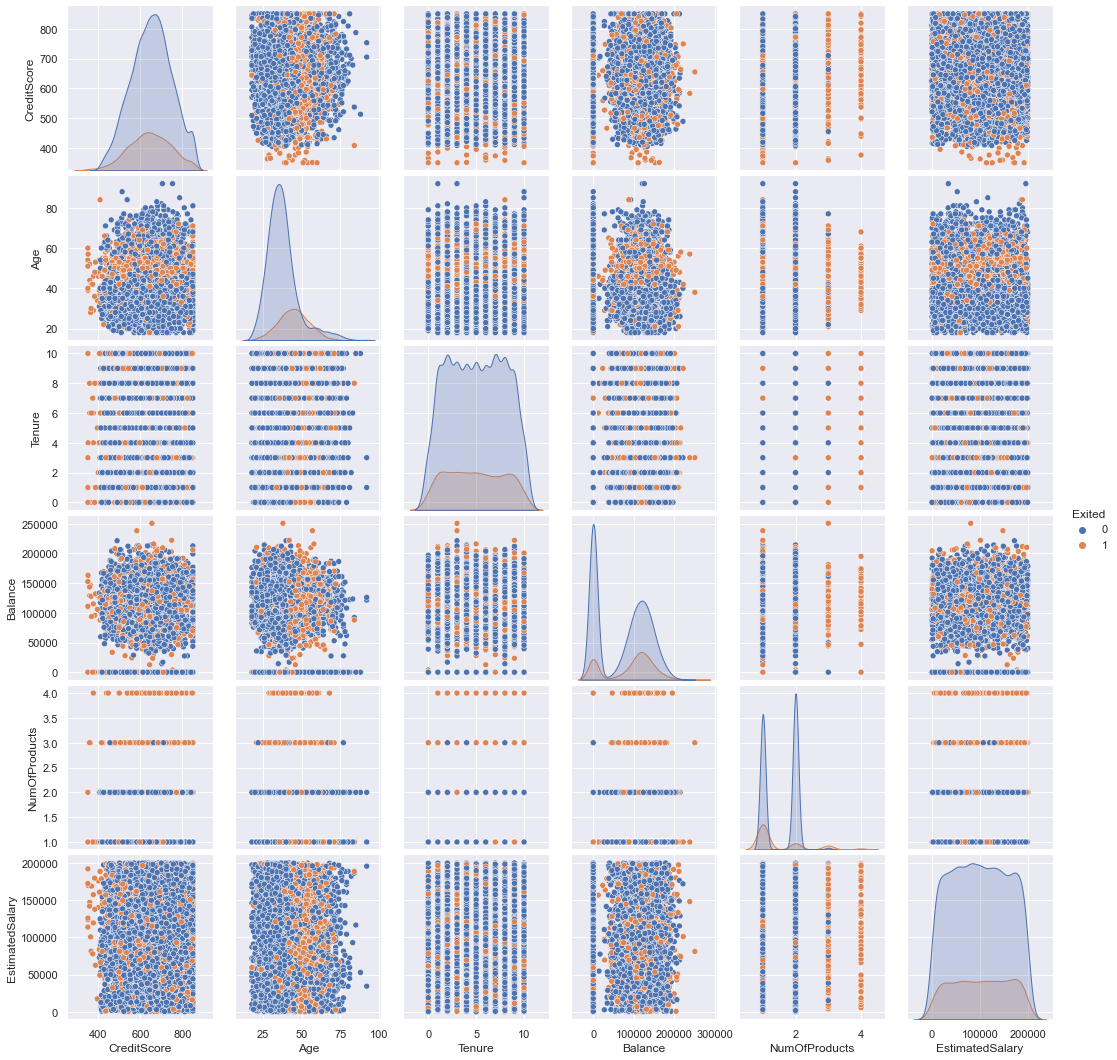

In [681]:
# Plotting pair plots between all numerical columns
num_col =['CreditScore','Age','Tenure','Balance','NumOfProducts', 'EstimatedSalary']+ ['Exited']
sns.pairplot(data[num_col],diag_kind="kde",  hue = 'Exited' )
plt.show()

<font color=darkorange>
<font size =4.5>
1.6.2 Plotting a heat map

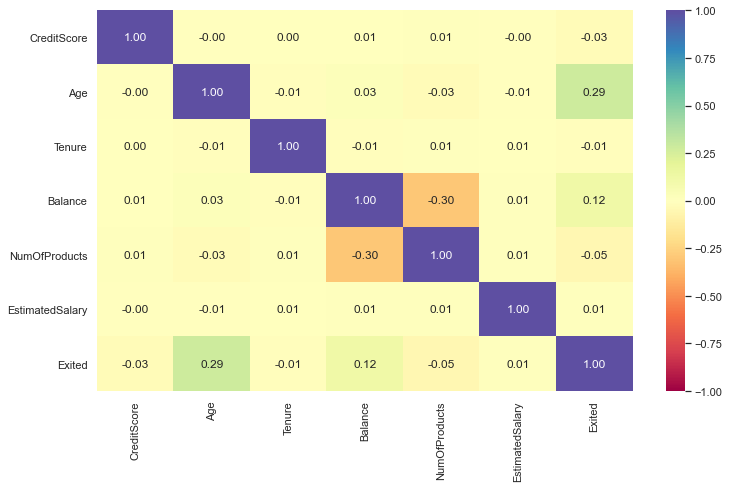

In [682]:
# Plotting a heat map
plt.figure(figsize=(12, 7))
sns.heatmap(
    bank_churn_bi.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


<font color=green>
<font size =1>
# Observations : Very less correlation between variables.


<font color=darkorange>
<font size =4.5>
1.6.3 Plotting a Bar Plot Correlation between Exited customers and all other parameters

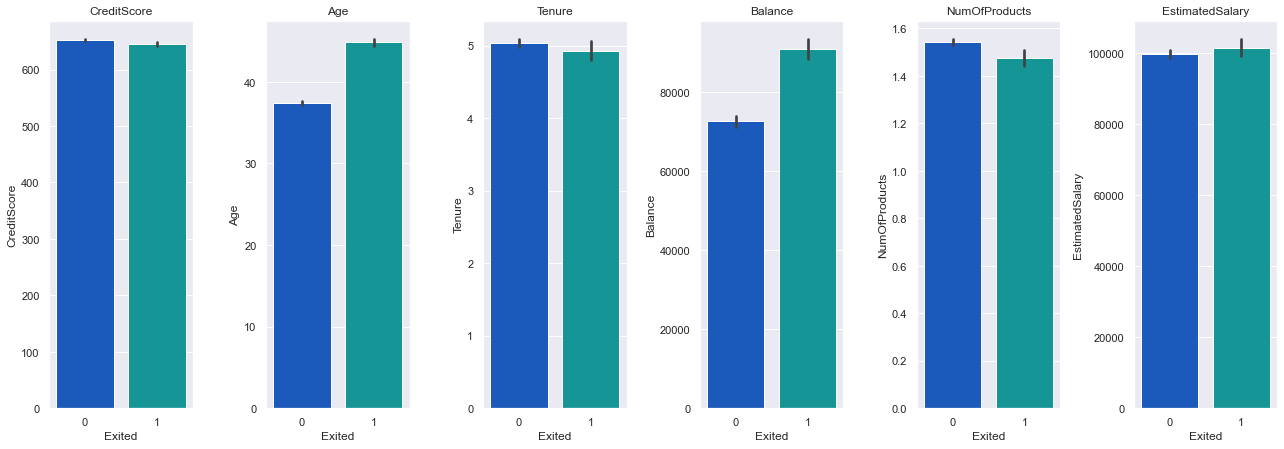

In [683]:
cols = bank_churn_bi[
    [
        'CreditScore',
       'Age',
        'Tenure',
       'Balance', 'NumOfProducts',
       'EstimatedSalary' ]
].columns.tolist()
plt.figure(figsize=(18,18 ))

for i, variable in enumerate(cols):
    plt.subplot(3, 6, i + 1)
    sns.barplot(bank_churn_bi["Exited"], bank_churn_bi[variable], palette="winter")
    plt.tight_layout()
    plt.title(variable)
plt.show()

<font color=Green>
<font size =1>
# Observations 


<font color = 'green'>

1. Customers with higher age are more likely to exit.
2. Customers with lower tenure are more likely to exit.
3. Customers with higher a
    ccount balance are more likely to exit.
4. Estimated salary, Credit score donot have a significant difference in exited and nt exited customers.


<font color=darkorange>
<font size =4.5>
1.6.4 Plotting a Stacked Bar Plot Correlation between Customer churn and categorical Dependent paparameters

In [684]:
def stacked_plot(x):
    
    sns.set(palette="ocean")
    tab1 = pd.crosstab(x, bank_churn_bi["Exited"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, bank_churn_bi["Exited"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(8,5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
  
    plt.show()
    

<font color=darkorange>
<font size =4.5>
1.6.4.1 Stacked Bar plot on Gender

Exited     0     1    All
Gender                   
Female  3404  1139   4543
Male    4559   898   5457
All     7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


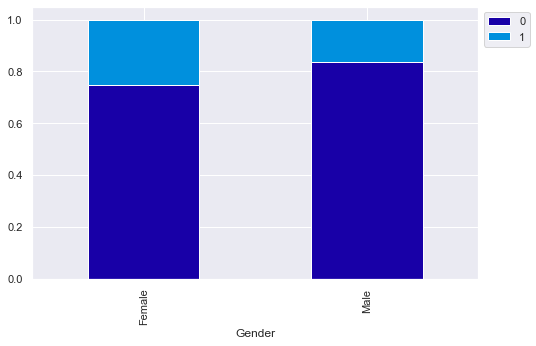

In [685]:

stacked_plot(bank_churn_bi["Gender"])


<font color=green>
<font size = 1>
# Observations :
Female customers are more likely to exit as compared to Male customers.


<font color=darkorange>
<font size =4.5>
1.6.4.2 Stacked Bar plot on Tenure

Exited     0     1    All
Tenure                   
0        318    95    413
1        803   232   1035
2        847   201   1048
3        796   213   1009
4        786   203    989
5        803   209   1012
6        771   196    967
7        851   177   1028
8        828   197   1025
9        771   213    984
10       389   101    490
All     7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


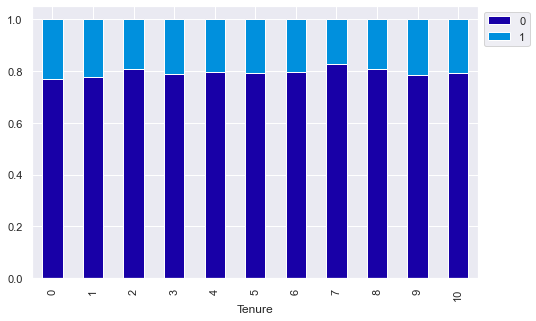

In [686]:
stacked_plot(bank_churn_bi["Tenure"])

<font color=green>
<font size = 1>
# Observations :
No distinguishable observations.


<font color=darkorange>
<font size =4.5>
1.6.4.3 Stacked Bar plot on  NumOfProducts

Exited            0     1    All
NumOfProducts                   
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
All            7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


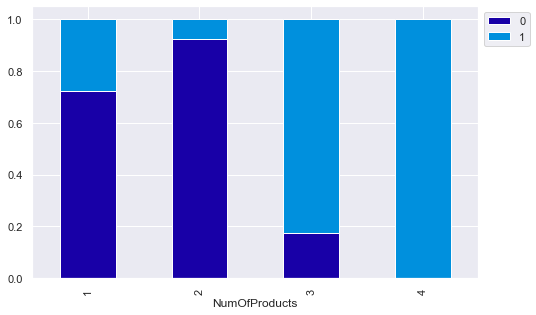

In [687]:
stacked_plot(bank_churn_bi["NumOfProducts"])

<font color=green>
<font size = 1>
# Observations :
Customers with 3 or 4 number of products are more likely to exit. Customers with 2 products are least likely to exit.


<font color=darkorange>
<font size =4.5>
1.6.4.4 Stacked Bar plot on  Geography

Exited        0     1    All
Geography                   
France     4204   810   5014
Germany    1695   814   2509
Spain      2064   413   2477
All        7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


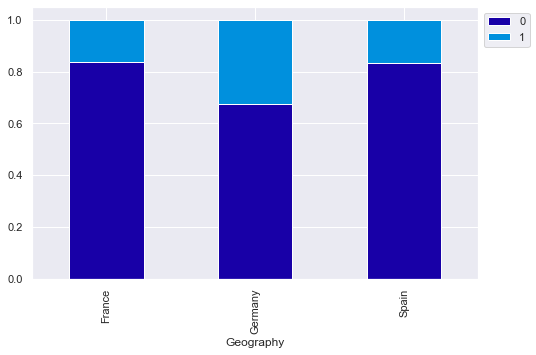

In [688]:
stacked_plot(bank_churn_bi["Geography"])

<font color=green>
<font size = 1>
# Observations :
Customers from Germany are more likely to exit as compared to France or Spain.


<font color=darkorange>
<font size =4.5>
1.6.4.5 Stacked Bar plot on  customers having credit card

Exited        0     1    All
HasCrCard                   
0          2332   613   2945
1          5631  1424   7055
All        7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


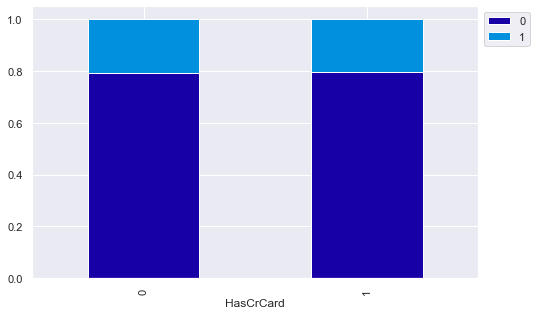

In [689]:
stacked_plot(bank_churn_bi["HasCrCard"])

<font color=green>
<font size = 1>
# Observations :
Having or not having a Credit card does not have a significant impact on exiting or staying with the bank.


<font color=darkorange>
<font size =4.5>
1.6.4.6 Stacked Bar plot on  IsActiveMember

Exited             0     1    All
IsActiveMember                   
0               3547  1302   4849
1               4416   735   5151
All             7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


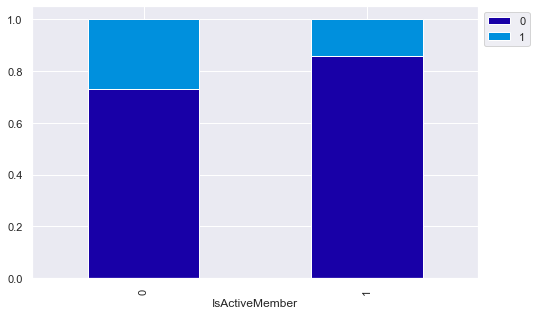

In [690]:
stacked_plot(bank_churn_bi["IsActiveMember"])

<font color=green>
<font size = 1>
# Observations :
Less active customers are more likely to exit


<font color=darkorange>
<font size =4.5>
1.6.4.7 Stacked Bar plot on  CreditScore

Exited              0     1    All
CreditScore_bin                   
Poor             1863   530   2393
Fair             2667   683   3350
Good             1946   451   2397
Very Good         969   246   1215
Exceptional       518   127    645
All              7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


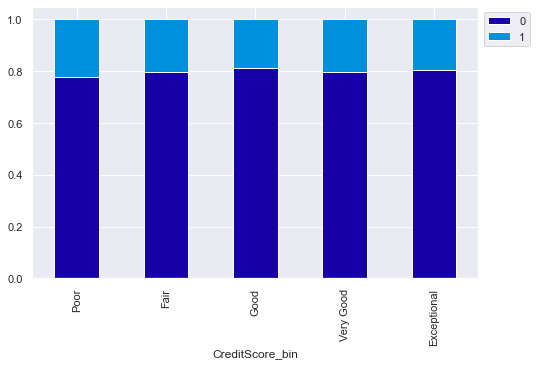

In [691]:
stacked_plot(bank_churn_bi["CreditScore_bin"])

<font color=green>
<font size = 1>
# Observations :
There is no significant impact of credit score on whether a customer would exit or stay with the bank. Customers with good and higher credit score are very slightly less likely to exit than others.


<font color=darkorange>
<font size =4.5>
1.6.4.8 Stacked Bar plot on  Balance

Exited             0     1    All
Balance_bin                      
Zero            3117   500   3617
0 to 5k            0     1      1
10k to 50k        49    25     74
50k to 100k     1209   300   1509
100k to 150k    2843   987   3830
150k to 200k     730   205    935
200k to 250 k     15    18     33
250k and above     0     1      1
All             7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


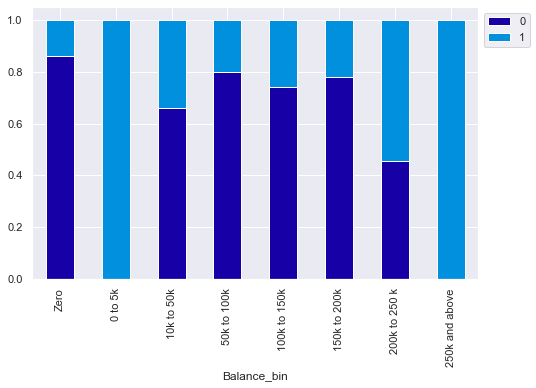

In [692]:
stacked_plot(bank_churn_bi["Balance_bin"])

<font color=green>
<font size = 1>
# Observations :
1) Customers in 200k to 250 k category followed by 10 k to 50k category are more likey to exit.
2) Customers with zero account balance are least likely to exit


<font color=darkorange>
<font size =4.5>
1.6.4.9 Stacked Bar plot on  Estimated Salary

Exited                  0     1    All
EstimatedSalary_bin                   
Less than 50k        1964   489   2453
50k to 100k          2033   504   2537
100k to 150k         2038   517   2555
150k and above       1928   527   2455
All                  7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


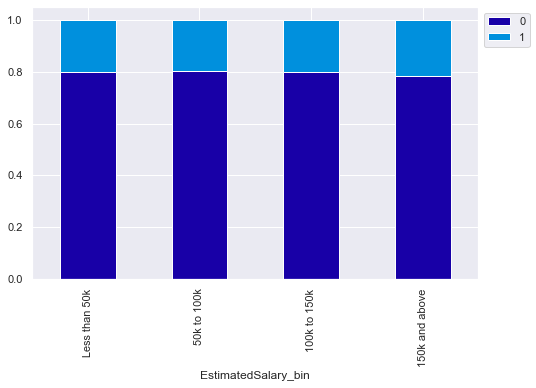

In [693]:
stacked_plot(bank_churn_bi["EstimatedSalary_bin"])

<font color=green>
<font size = 1>
# Observations :

    1) No significant correlation between salary and customers exiting.


<font color=darkorange>
<font size =4.5>
1.6.5 Effect of Credit score and geography on customers leaving bank.

In [694]:
f= bank_churn_bi.groupby(['CreditScore_bin', 'Exited', 'Geography']).size().reset_index(name ='count')
x = f.sort_values(['Exited'],ascending=False).groupby('Exited').head()
print(x)

   CreditScore_bin  Exited Geography  count
15            Good       1    France    187
10            Fair       1   Germany    271
28     Exceptional       1   Germany     52
27     Exceptional       1    France     49
23       Very Good       1     Spain     47
6             Fair       0    France   1375
2             Poor       0     Spain    473
26     Exceptional       0     Spain    127
25     Exceptional       0   Germany    123
24     Exceptional       0    France    268


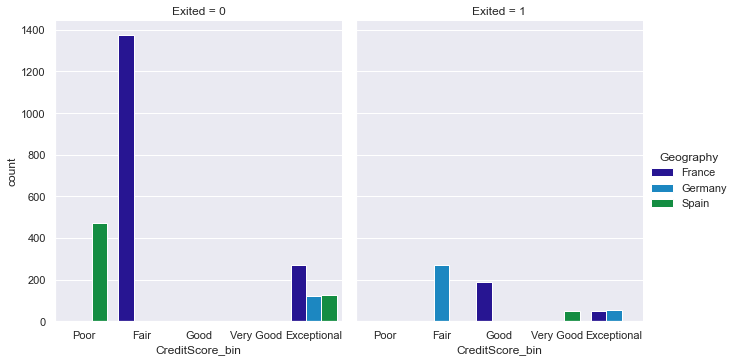

In [695]:

ax = sns.catplot(x="CreditScore_bin", y="count", hue="Geography",
            col = 'Exited' ,aspect=.9,
            kind="bar", data=x)

<font color=green>
<font size = 1>
# Observations :
1) Customers even with poor credit score are least likely to exit in any of the three geographical locations. 
2) Customers with Fair credit score are also less likely to exit in france and Spain. But in Germany customers with fair credit score are more likely to exit.
3) Customers with Good and Very good credit score are more likely to exit as they are likely to get better offers else where. Bank should offer special offers to these customers to retain them.
4) Overall customers with exceptional credit score are less likely to exit but in France and Germany some customers are seen to leave the bank even in this category.

<font color=darkorange>
<font size =4.5>
1.6.5 Effect of Number of products and geography on customers leaving bank.

In [744]:
f= bank_churn_bi.groupby(['NumOfProducts', 'Exited', 'Geography']).size().reset_index(name ='count')
x = f.sort_values(['Exited'],ascending=False).groupby('NumOfProducts').head()
print(x)

    NumOfProducts  Exited Geography  count
23              4       1     Spain      7
15              3       1    France     82
22              4       1   Germany     24
3               1       1    France    564
4               1       1   Germany    578
5               1       1     Spain    267
21              4       1    France     29
9               2       1    France    135
10              2       1   Germany    126
11              2       1     Spain     87
17              3       1     Spain     52
16              3       1   Germany     86
20              4       0     Spain      0
19              4       0   Germany      0
0               1       0    France   1950
14              3       0     Spain     14
13              3       0   Germany     10
1               1       0   Germany    771
8               2       0     Spain   1096
7               2       0   Germany    914


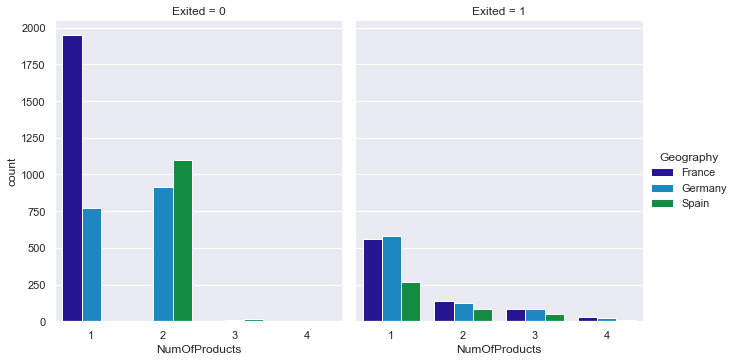

In [745]:

ax = sns.catplot(x="NumOfProducts", y="count", hue="Geography",
            col = 'Exited' ,aspect=.9,
            kind="bar", data=x)

<font color=green>
<font size = 1>
# Observations :
1) Customers even with poor credit score are least likely to exit in any of the three geographical locations. 
2) Customers with Fair credit score are also less likely to exit in france and Spain. But in Germany customers with fair credit score are more likely to exit.
3) Customers with Good and Very good credit score are more likely to exit as they are likely to get better offers else where. Bank should offer special offers to these customers to retain them.
4) Overall customers with exceptional credit score are less likely to exit but in France and Germany some customers are seen to leave the bank even in this category.

<font color=darkorange>
<font size =4.5>
1.6.6 Observation on binned Credit score and customer exit.

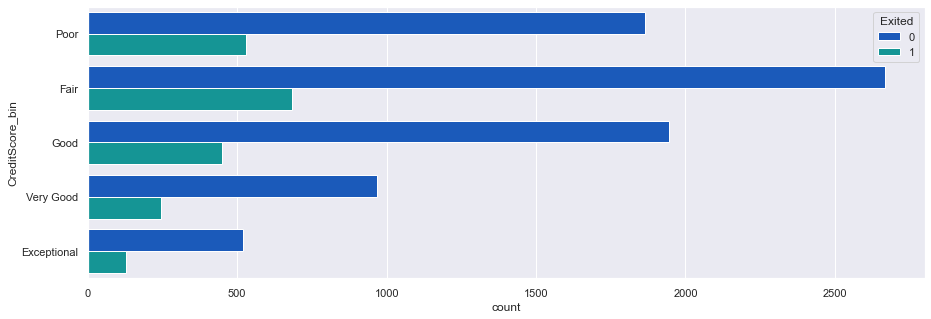

In [698]:
# Plotting a plot of Binned Credit Score for Exited and Not exited stomer.
plt.figure(figsize=(15,5))
ax=sns.countplot(y='CreditScore_bin',hue ='Exited', data= bank_churn_bi, palette='winter') 

<font color=darkorange>
<font size =4.5>
1.6.7 Observation on binned Account Balance and customer exit.

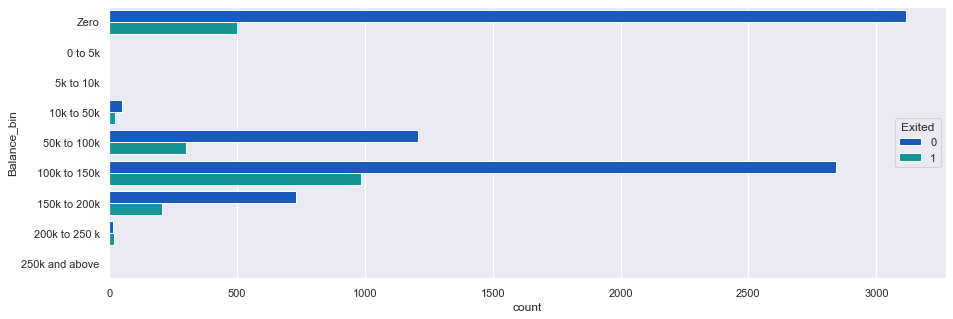

In [699]:
# Plotting a plot of Binned Account Balance for Exited and Not exited stomer.
plt.figure(figsize=(15,5))
ax=sns.countplot(y='Balance_bin',hue ='Exited', data= bank_churn_bi, palette='winter') 

<font color=darkorange>
<font size =4.5>
1.6.8 Observation on binned Estimated Salary and customer exit.

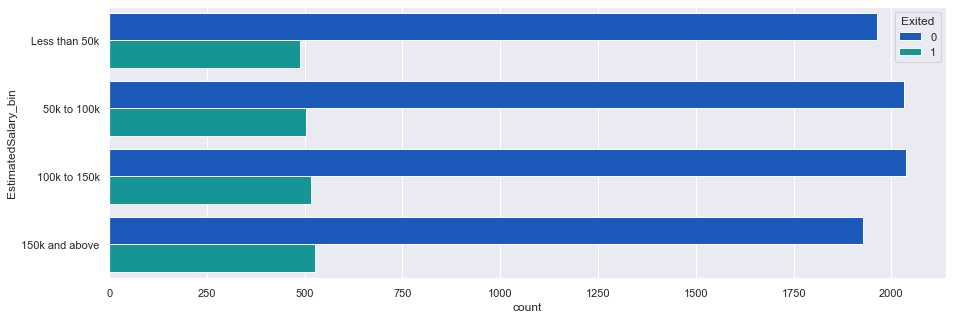

In [700]:
# Plotting a plot of Binned CSalary for Exited and Not exited customer.
plt.figure(figsize=(15,5))
ax=sns.countplot(y='EstimatedSalary_bin',hue ='Exited', data= bank_churn_bi, palette='winter') 

<font color=darkorange>
<font size =4.5>
1.6.9 Observation on distribution of various parameters with respect to customer exit.

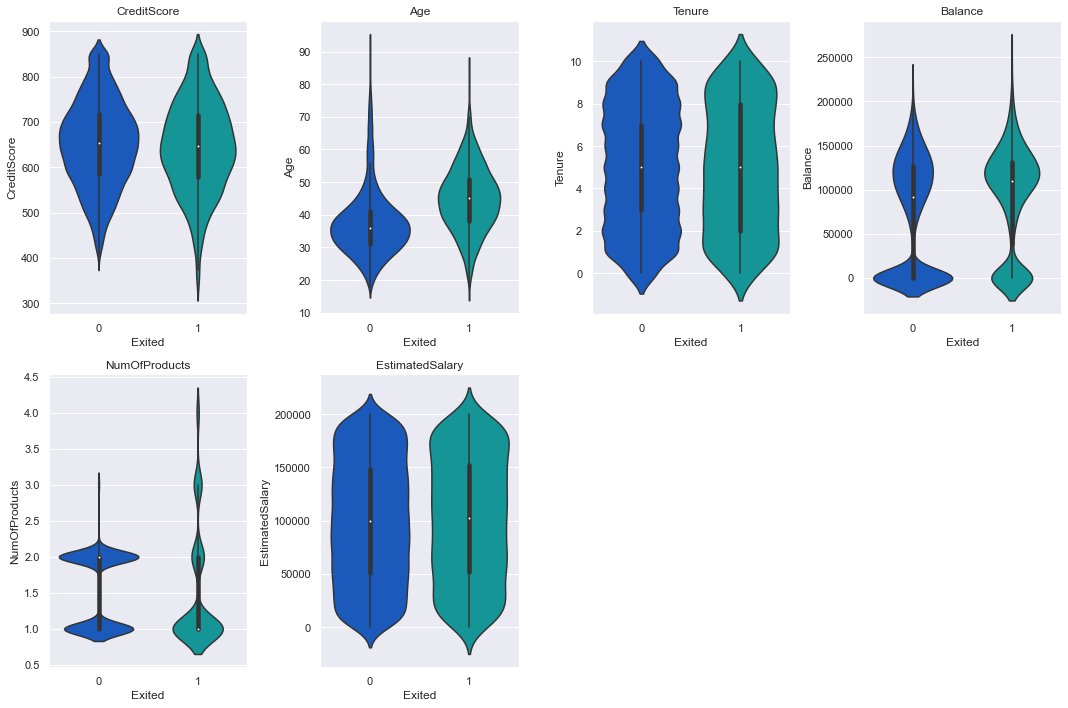

In [701]:
cols = bank_churn_bi[['CreditScore','Age','Tenure','Balance', 'NumOfProducts','EstimatedSalary' ]].columns.tolist()
plt.figure(figsize=(15,10))

for i, variable in enumerate(cols):
                     plt.subplot(2,4,i+1)
                     sns.violinplot(bank_churn_bi['Exited'],bank_churn_bi[variable],palette="winter")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

<font color=darkcyan>
<font size =5>
1.7 Data Pre-Processing

In [702]:
churn_prep = bank_churn.copy()


<font color=darkorange>
<font size =4.5>
1.7.1 One hot Encoding

In [703]:
churn_encd = pd.get_dummies(data=churn_prep,columns=['Geography'])
churn_encd

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [704]:
churn_encd = churn_encd.replace(to_replace={'Gender': {'Female': 1,'Male':0}})
churn_encd

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


<font color=darkorange>
<font size =4.5>
1.7.2 Split  into Target variable and predictors

In [705]:
#Splitting data into X and Y where X has the predictors and Y has the target variable.
X = churn_encd.drop(['Exited'],axis=1)
Y = churn_encd['Exited']

<font color=darkorange>
<font size =4.5>
1.7.3 Split  into Train , Test and validation data set.

In [706]:
#Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [707]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 12)
(2000, 12)
(8000,)
(2000,)


<font color=darkorange>
<font size =4.5>
1.7.4 Scaling the dataset.

In [708]:
#Standard scaler is used here.
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

<font color=darkcyan>
<font size =5>
1.8 Model Building : Build a Neural Network :Model 1

<font color = 'green'>
<font size =2 >

Model 1 : Basic Deep Neural Network model, with `relu` activitation, input layer and two hidden layers and a output layer.Optimizer used is `Adam`

<font color=darkorange>
<font size =4.5>
1.8.1 Initialize  model

In [709]:
# Using Tensorflow Keras to initialize sequential model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model1= Sequential()

<font color=darkorange>
<font size =4.5>
1.8.2 Adding layers

<font color = 'green'>
<font size =1 >
Keras layers can be added to the model. It should be noted that as this is a classification problem, hence we add a sigmoid layer since its a binary output function. We cpould have used softmax if it was a multi-class output.

In [710]:
# Adding the first input layer and the first hidden layer
model1.add(Dense(units=6, input_dim = 12,activation='relu'))   # input of 12 columns
# Adding second hidden layer
model1.add(Dense(units=6,activation='relu'))
# Adding the output layer
model1.add(Dense(units= 1,activation='sigmoid'))  # sigmoid to get probability outcomes


<font color=darkorange>
<font size =4.5>
1.8.3 Model compile [optimizers and loss functions]

In [711]:
# Create optimizer with default learning rate
# Compile the model
#optimizer = tf.keras.optimizers.Adam(0.01)
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [712]:
# Print the model summary
model1.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 6)                 78        
_________________________________________________________________
dense_134 (Dense)            (None, 6)                 42        
_________________________________________________________________
dense_135 (Dense)            (None, 1)                 7         
Total params: 127
Trainable params: 127
Non-trainable params: 0
_________________________________________________________________


<font color=darkorange>
<font size =4.5>
1.8.4 Training [Forward pass and Backpropagation]

In [713]:
#fitting the model
history=model1.fit(X_train,y_train,batch_size=10,epochs=100,validation_split=0.2)

Epoch 1/100
640/640 [==============================] - 1s 843us/step - loss: 0.5170 - accuracy: 0.7552 - val_loss: 0.4579 - val_accuracy: 0.7975
Epoch 2/100
640/640 [==============================] - 0s 719us/step - loss: 0.4478 - accuracy: 0.7991 - val_loss: 0.4378 - val_accuracy: 0.8025
Epoch 3/100
640/640 [==============================] - 0s 711us/step - loss: 0.4323 - accuracy: 0.8086 - val_loss: 0.4280 - val_accuracy: 0.8131
Epoch 4/100
640/640 [==============================] - 0s 705us/step - loss: 0.4218 - accuracy: 0.8138 - val_loss: 0.4181 - val_accuracy: 0.8219
Epoch 5/100
640/640 [==============================] - 0s 706us/step - loss: 0.4116 - accuracy: 0.8230 - val_loss: 0.4117 - val_accuracy: 0.8200
Epoch 6/100
640/640 [==============================] - 0s 705us/step - loss: 0.4005 - accuracy: 0.8289 - val_loss: 0.4012 - val_accuracy: 0.8275
Epoch 7/100
640/640 [==============================] - 0s 704us/step - loss: 0.3879 - accuracy: 0.8355 - val_loss: 0.3904 - val_ac

<font color=darkorange>
<font size =4.5>
1.8.5 Plotting the train and test loss

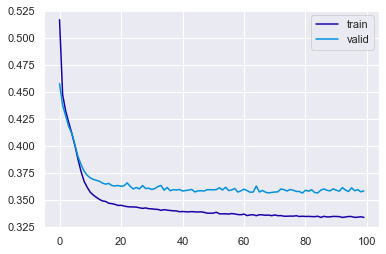

In [714]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


<font color = 'green'>
<font size =1 >
Training and validation are almost similar. And loss is reducing as accuracy increases.

<font color=darkcyan>
<font size =5>
1.9 Model Performance evaluation and improvement

<font color=darkorange>
<font size =4.5>
1.9.1 Model Performance Metrics

<font color = 'green'>

### Model can make wrong predictions as:
1. Predicting a customer will leave but he does not leave in next six months.
2. Predicting a customer will not leave but he exits in next six months.

### Which case is more important? 
* Predicting a customer will not leave but he leaves, this is big loss for the bank. As we lose the customer and do nothing to retain the customer.i.e False Negative. hence we need to improve `recall` to balance for this.
* Predicting customer will leave but he stays does not affect the bank that much , as we will not lose the customer, just some extra on services provided and marketing to retain the customer. 


### How to reduce this loss i.e need to reduce False Negatives?
* We need to help the bank improve its services so that customers do not exit the bank . That is bank does not lose customers, hence here we need to reduce False Negatives, `recall' is an important factor here. Bank would want Recall to be maximized, greater the Recall lesser the chances of false negatives.

<font color=darkorange>
<font size =4.5>
1.9.2 Evaluation and Confusion Matrix

In [715]:
score = model1.evaluate(X_test, y_test)

63/63 [==============================] - 0s 875us/step - loss: 0.3409 - accuracy: 0.8580


In [716]:
print(score)

[0.3409038484096527, 0.8579999804496765]


<font color = 'green'>
<font size =2 >

**Observations**

- The model achieves an accuracy of 86.1 %


In [717]:
# Function for confusion matrix and performance metrics
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

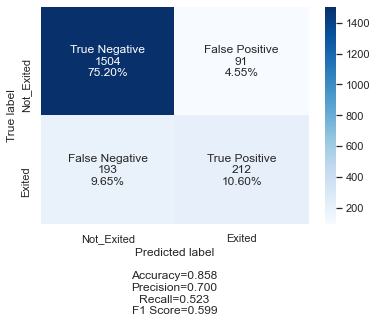

In [718]:
## Confusion Matrix on unseen test set
import seaborn as sn
y_pred1 = model1.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0

cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

<font color = 'green'>
<font size =2 >


**Observations: Model Performance**

- The model achieves an accuracy of 86.1 %
- But the evaluation parameter Recall to reduce False Negatives is very less.We have around 202 false negatives where we predicted customer will stay with bank but the customer has left the bank.
- We must build another model to improve on recall by tuning hyperparameters.


<font color=darkorange>
<font size =4.5>
1.9.3 Plot ROC-AUC curve

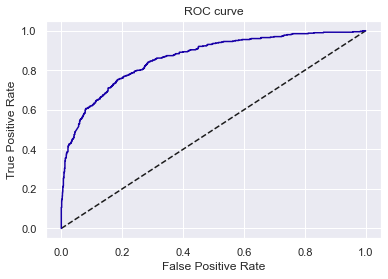

In [719]:
from sklearn.metrics import roc_curve
y_pred_proba = model1.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

<font color=darkorange>
<font size =4.5>
1.9.3.1 Area under ROC curve

In [720]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8628538256124463

<font color=darkorange>
<font size =4.5>
1.9.3.2 Optimal threshold using ROC-AUC curve

In [721]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_proba )

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.2606193


<font color = 'green'>
<font size =1 >
Area under the curve is 0.86. Optimal threshold value using ROC-AUC curve is 0.22.

<font color=darkcyan>
<font size =5>
1.10 Deep Neural Network : Model 2

<font color = 'green'>
<font size =2 >

Model 2.1 : Hyper parameters tuned in this model to improve performance are Early stopping and weight initialization, also adding dropout layer.
    We will be using GlorotUniform weight initializer type of  Xaviour Initialization and Dropout 0.1
    

<font color=darkorange>
<font size =4.5>
1.10.1 Model 2.1 :Initialize , Compile and Train(GlorotUniform initialization technique)

In [722]:
#Initialize ,Train and fit the model

#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()
#Initializing the weights uisng GlorotUniform 
Model2.add(Dense(6, input_dim=12, kernel_initializer='GlorotUniform', activation='relu'))#Input layer
Model2.add(Dropout(0.1))# Added Dropout layer
Model2.add(Dense(6, kernel_initializer='GlorotUniform', activation='relu'))# Hidden layer
Model2.add(Dropout(0.1))# Added Dropout layer
Model2.add(Dense(1, kernel_initializer='GlorotUniform', activation='sigmoid'))# Output layer

Model2.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])# Compile model using Adam optimizer and loss function
    
his_mod2= Model2.fit(X_train, y_train, validation_split=0.2, batch_size=10, epochs=100, callbacks=[es], shuffle=True, verbose=1) # Train the model


Epoch 1/100
640/640 [==============================] - 1s 866us/step - loss: 0.5295 - accuracy: 0.7697 - val_loss: 0.4677 - val_accuracy: 0.7962
Epoch 2/100
640/640 [==============================] - 0s 728us/step - loss: 0.4647 - accuracy: 0.7947 - val_loss: 0.4435 - val_accuracy: 0.7975
Epoch 3/100
640/640 [==============================] - 0s 726us/step - loss: 0.4440 - accuracy: 0.7970 - val_loss: 0.4279 - val_accuracy: 0.8006
Epoch 4/100
640/640 [==============================] - 0s 722us/step - loss: 0.4279 - accuracy: 0.8098 - val_loss: 0.4100 - val_accuracy: 0.8169
Epoch 5/100
640/640 [==============================] - 0s 731us/step - loss: 0.4165 - accuracy: 0.8211 - val_loss: 0.3989 - val_accuracy: 0.8281
Epoch 6/100
640/640 [==============================] - 0s 725us/step - loss: 0.4021 - accuracy: 0.8278 - val_loss: 0.3895 - val_accuracy: 0.8363
Epoch 7/100
640/640 [==============================] - 0s 720us/step - loss: 0.3961 - accuracy: 0.8338 - val_loss: 0.3848 - val_ac

<font color=darkorange>
<font size =4.5>
1.10.1.1 Plotting the train and validation loss

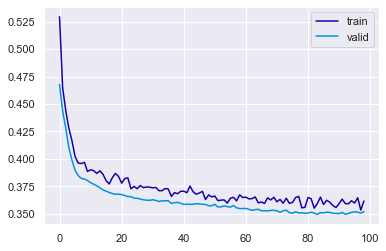

In [723]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod2.history)
hist['epoch'] = his_mod2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


<font color = 'green'>
<font size =1 >
Training and validation are almost similar. And loss is reducing as accuracy increases.

<font color=darkorange>
<font size =4.5>
1.10.1.2 Evaluation and Confusion Matrix

In [724]:
score2 = Model2.evaluate(X_test, y_test)

63/63 [==============================] - 0s 910us/step - loss: 0.3385 - accuracy: 0.8655


In [725]:
print(score2)

[0.33850064873695374, 0.8654999732971191]


<font color = 'green'>
<font size =2 >

**Observations**

- The model achieves an accuracy of 85.7 %


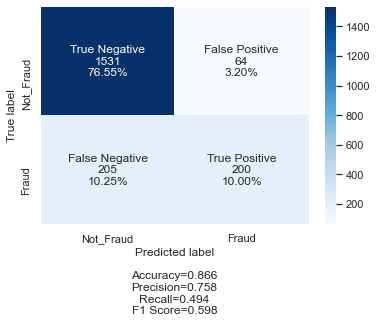

In [726]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = Model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

<font color = 'green'>
<font size =2 >


**Observations: Model Performance**

- The model achieves an accuracy of 85.8% .
- But Recall has declined as compared to previous model.
- This hyperparameter tuning has not given desirable outputs, next we will try other weight initializer techniques
    


<font color=darkorange>
<font size =4.5>
1.10.2 Model 2.2  :Initialize , Compile and Train

<font color = 'green'>
<font size =2 >

Model 2.2 : Hyper parameters tuned in this model to improve performance are Early stopping and weight initialization, also adding dropout layer.
    We will be using he_normal Initialization and Dropout 0.2
    

In [727]:
#Initialize ,Train and fit the model

#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)
Model2_2 = Sequential()
#Initializing the weights uisng GlorotUniform 
Model2_2.add(Dense(6, input_dim=12, kernel_initializer='he_normal', activation='relu'))#Input layer
Model2_2.add(Dropout(0.1))# Added Dropout layer
Model2_2.add(Dense(6, kernel_initializer='he_normal', activation='relu'))# Hidden layer
Model2_2.add(Dropout(0.1))# Added Dropout layer
Model2_2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))# Output layer

Model2_2.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])# Compile model using Adam optimizer and loss function
    
his_mod2_2= Model2_2.fit(X_train, y_train, validation_split=0.2, batch_size=10, epochs=100, callbacks=[es], shuffle=True, verbose=1) # Train the model


Epoch 1/100
640/640 [==============================] - 1s 890us/step - loss: 0.5558 - accuracy: 0.7370 - val_loss: 0.4666 - val_accuracy: 0.8000
Epoch 2/100
640/640 [==============================] - 0s 744us/step - loss: 0.4719 - accuracy: 0.7920 - val_loss: 0.4478 - val_accuracy: 0.7987
Epoch 3/100
640/640 [==============================] - 0s 735us/step - loss: 0.4586 - accuracy: 0.7959 - val_loss: 0.4394 - val_accuracy: 0.7994
Epoch 4/100
640/640 [==============================] - 0s 744us/step - loss: 0.4477 - accuracy: 0.7981 - val_loss: 0.4322 - val_accuracy: 0.7981
Epoch 5/100
640/640 [==============================] - 0s 734us/step - loss: 0.4401 - accuracy: 0.8028 - val_loss: 0.4261 - val_accuracy: 0.8037
Epoch 6/100
640/640 [==============================] - 0s 742us/step - loss: 0.4365 - accuracy: 0.8091 - val_loss: 0.4222 - val_accuracy: 0.8138
Epoch 7/100
640/640 [==============================] - 0s 715us/step - loss: 0.4329 - accuracy: 0.8177 - val_loss: 0.4170 - val_ac

<font color=darkorange>
<font size =4.5>
1.10.2.1 Plotting the train and validation loss

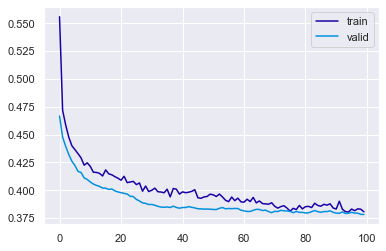

In [728]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod2_2.history)
hist['epoch'] = his_mod2_2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


<font color = 'green'>
<font size =1 >
Training and validation are almost similar. And loss is reducing as accuracy increases.

<font color=darkorange>
<font size =4.5>
1.10.2.2 Evaluation and Confusion Matrix

In [729]:
score2 = Model2_2.evaluate(X_test, y_test)

63/63 [==============================] - 0s 989us/step - loss: 0.3702 - accuracy: 0.8485


In [730]:
print(score2)

[0.3701920211315155, 0.8485000133514404]


<font color = 'green'>
<font size =2 >

**Observations**

- The model achieves an accuracy of 85.7 %


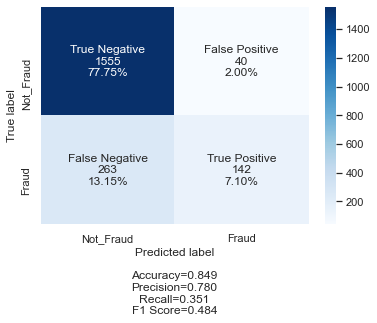

In [731]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = Model2_2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

<font color = 'green'>
<font size =2 >


**Observations: Model Performance**

- The model achieves slightly higher accuracy .
- But Recall has no significant improvement.
- This hyperparameter tuning has not given desirable outputs, next we will try class weights
    


<font color=darkorange>
<font size =4.5>
1.9.3 Plot ROC-AUC curve

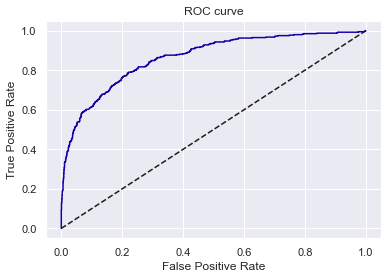

In [732]:
from sklearn.metrics import roc_curve
y_pred_proba2 = Model2.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba2)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

<font color=darkorange>
<font size =4.5>
1.9.3.1 Area under ROC curve

In [733]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba2)

0.8640806532760555

<font color=darkorange>
<font size =4.5>
1.9.3.2 Optimal threshold using ROC-AUC curve

In [734]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_proba2 )

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.20596442


<font color = 'green'>
<font size =1 >
Area under the curve is 0.86. Optimal threshold value using ROC-AUC curve is 0.22.

<font color=darkcyan>
<font size =5>
1.11 Deep Neural Network : Model 3

<font color = 'green'>
<font size =2 >

Model 3 : We will adjust the class imbalance by giving additional weight to the loss associated. We will apply weighted loss to our first ANN model.
    

<font color=darkorange>
<font size =4.5>
1.11.1 Class weights

<font color = 'green'>
<font size =2 >

The class 'Exited' (y=1) is assigned a weight of 2.4 vs 0.6 for the class 'not exited' due to the very low prevalence we detected during data exploration. This allows the model to give more importance to the errors made on exited cases during training.
    

In [735]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.array([y_train.iloc[i] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.628140703517588, 1: 2.450980392156863}

<font color=darkorange>
<font size =4.5>
1.11.2 Training the model

In [736]:
Model2.fit(X_train,y_train,batch_size=10,validation_split=0.2,epochs=100, class_weight=class_weights, shuffle=True)

Epoch 1/100
640/640 [==============================] - 1s 1ms/step - loss: 0.5129 - accuracy: 0.8242 - val_loss: 0.4490 - val_accuracy: 0.8138
Epoch 2/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4959 - accuracy: 0.8075 - val_loss: 0.4543 - val_accuracy: 0.8150
Epoch 3/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4917 - accuracy: 0.8087 - val_loss: 0.4487 - val_accuracy: 0.8119
Epoch 4/100
640/640 [==============================] - 1s 1ms/step - loss: 0.5035 - accuracy: 0.8003 - val_loss: 0.4624 - val_accuracy: 0.8106
Epoch 5/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4874 - accuracy: 0.8073 - val_loss: 0.4515 - val_accuracy: 0.8112
Epoch 6/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4925 - accuracy: 0.8103 - val_loss: 0.4573 - val_accuracy: 0.8125
Epoch 7/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4969 - accuracy: 0.8066 - val_loss: 0.4665 - val_accuracy: 0.8213

Epoch 58/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4933 - accuracy: 0.7691 - val_loss: 0.4856 - val_accuracy: 0.7694
Epoch 59/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4932 - accuracy: 0.7759 - val_loss: 0.4704 - val_accuracy: 0.7769
Epoch 60/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4792 - accuracy: 0.7773 - val_loss: 0.4666 - val_accuracy: 0.7794
Epoch 61/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4804 - accuracy: 0.7795 - val_loss: 0.4668 - val_accuracy: 0.7781
Epoch 62/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4843 - accuracy: 0.7678 - val_loss: 0.4439 - val_accuracy: 0.7887
Epoch 63/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4835 - accuracy: 0.7769 - val_loss: 0.4711 - val_accuracy: 0.7750
Epoch 64/100
640/640 [==============================] - 1s 1ms/step - loss: 0.4902 - accuracy: 0.7714 - val_loss: 0.4625 - val_accuracy:

<font color=darkorange>
<font size =4.5>
1.11.3 Plotting the train and validation loss

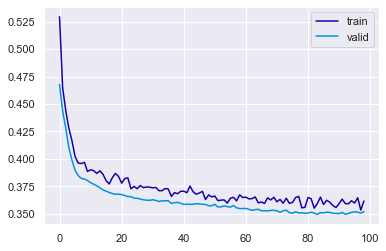

In [737]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod2.history)
hist['epoch'] = his_mod2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


<font color=darkorange>
<font size =4.5>
1.11.4 Plotting confusion matrix 

In [738]:
score_weighted = Model2.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.4779 - accuracy: 0.7725


In [739]:
print(score_weighted)

[0.47787126898765564, 0.7724999785423279]


<font color = 'green'>
<font size =2 >

**Observations**

- The model has reduced in Accuracy to 77%


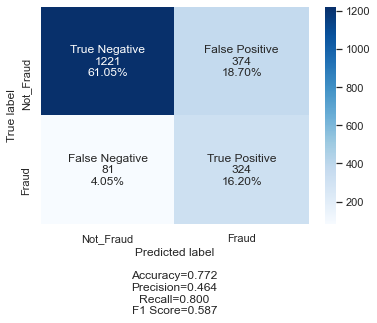

In [740]:
## Confusion Matrix on unseen test set
import seaborn as sn
y_pred1 = Model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)

labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

<font color = 'green'>
<font size =2 >


**Observations: Model Performance**

- The Model has reduced in Accuracy but has a Significant increase in our Recall metric.
- As recall is the most important Performance metric as per our evaluation, a recall of 80% is significantly good as compared to other models.
- Hence this model with class weights can be considered our best model.
    


<font color=darkorange>
<font size =4.5>
1.11.5 Plot ROC-AUC curve

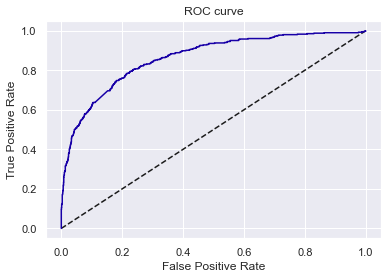

In [741]:
from sklearn.metrics import roc_curve
y_pred_proba3 = Model2.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba3)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

<font color=darkorange>
<font size =4.5>
1.11.5.1 Area under ROC curve

In [742]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba3)

0.862239250744998

<font color=darkorange>
<font size =4.5>
1.11.5.2 Optimal threshold using ROC-AUC curve

In [743]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_proba3 )

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.51424086


<font color = 'green'>
<font size =1 >
Area under the curve is 0.86. Optimal threshold value using ROC-AUC curve is 0.57.

<font color = 'green'>
<font size =2 > 
    
 ***Model Performance Evaluation and scope of improvement ***


 As you can see here the Recall is increased but the precision is very bad.  There is still  lot of scope of  improvements  as follows:

1) Threshold can be tuned to get the optimal value 

2) Resampling techniques can be applied to balanced the data and then train the model 

3) Hyperparameter tuning can be applied to tune the different Hyperparameters


We can select the Model-2 with class weights as our final model based on the above analysis 

<font color=darkcyan>
<font size =5>
Conclusion

### <a id='link1'> Summary of EDA</a>

<font color = 'black'>
**Key Observations**
    
    

1) `CreditScore`:Credit score varies from a in of 350 to a max of 850. Mean and median are almost similar. Hence data is not skewed. Many customers have 850 credit score i.e. almost 233 customers. Values need to be binned in categories for further evaluation. In binned credit score , Most customers have a fair, poor and good credit score. Very few customers have a credit score exceptional credit score. Almost 33.5 % of customers have fair credit scores. Followed by  24% of Good score. Less than 7 % of total have a exceptional score.
    
2) `Age` : Age of customers varies from 18 to 92. Data doenot appear to be skewed. Age of the customer is too varied ranging from 18 to 92. Needs binning for further evaluation. Right skew. Spikes just before 30,40,50. After 60 and 70. Most customers are in range 25 to 45. Very less customers after the age of 65
    
3) `Tenure` : Customer tenure with bank varies from 0 to 10 years. Maximum customers with bank have been for 1 or 2 years. Needs further evaluation.

4) `Balance`: Account Balance varies from 0 to 250000 approx. Data appears left skewed .Balance needs binning for evaluation as it is too varied. Almost 3600 plus customers have zero account balance. this issue needs to be addresed and evaluated further. In binned balance, Most customers have either zero or between 100k to 150k balance in account. Very few customers with 1 to 50k and more than 200k account balance. 36.2 % customers have zero account balance. 38.3 5 customers have account balance between 100k to 150k.

5) `NumOfProducts`:  Number of products of the bank each customer has varies fro 1 to 4. Most customers have 1 product with bank.Most customers appear to have 1 or 2 products. Very few customers have 3 or 4 products. 50% of customers have 1 product with bank. Less than 3% have 3 or 4 products

6) `EstimatedSalary`: Estimated salary varies from 11.58 to almost 200000. No skew.Too varied data, needs binning for further evaluation. in binned Salary , Each Salary category has almost equal number of customers
    
7) `Geography`: Maximum customers belong to geographical location of France. Customers have 3 geographical locations, i.e., France, Spain, Germany. France has maximum customers with 5014 customers from there.
   
8) `Gender`: Maximum customers are Male i.e. 5457 customers.51.5 % are active users whereas 48.5% are not active members.
    
9) `HasCrCard`: Almost 7055 customers that is maximum customers have credit cards with the bank. Almost 70% of customers have credit card.
    
10) `IsActiveMember`: Maximum customers are active members and are regularly using bank services.
    
11) `Exited`: Maximum customers have not exited More than 7900 customers out of 10000 have stayed with the bank. As this is our target variable we need to address the issue of biased data in our future evaluations. Almost 80% didnt leave , whereas 20% left the bank.
    
12) `CustomerId`,`RowNumber`, `Surname` : CustomerId column doesnot have any repeated customers hence no duplicate entries.As it is a unique number representing each customer hence can be deleted as it has no contribution to EDA. Surname : Last name of customer has no valuable information regarding the churn rate of the customer hence is a unique customer rate and can be eliminated. RowNumber is a redundant serial number, hence has no value for analysis and can be removed.


**Key Meaningful observations from EDA** 
 

1) Customers with higher age are more likely to exit.
    
2) Customers with lower tenure are more likely to exit.
    
3) Customers with higher account balance are more likely to exit.
    
4) Estimated salary, Credit score donot have a significant difference in exited and nt exited customers.
    
5) Female customers are more likely to exit as compared to Male customers.
    
6) Customers with 3 or 4 number of products are more likely to exit. Customers with 2 products are least likely to exit.
    
7)Customers from Germany are more likely to exit as compared to France or Spain.

8)Having or not having a Credit card does not have a significant impact on exiting or staying with the bank.

9) Less active customers are more likely to exit

11) Customers in 200k to 250 k category followed by 10 k to 50k category are more likey to exit.
    
12) Customers with zero account balance are least likely to exit

13) No significant correlation between salary and customers exiting.

14) Customers even with poor credit score are least likely to exit in any of the three geographical locations. 
    
15) Customers with Fair credit score are also less likely to exit in france and Spain. But in Germany customers with fair credit score are more likely to exit.
    
16) Customers with Good and Very good credit score are more likely to exit as they are likely to get better offers else where. Bank should offer special offers to these customers to retain them.
    
17) Overall customers with exceptional credit score are less likely to exit but in France and Germany some customers are seen to leave the bank even in this category.



### <a id='link1'>Key Takeaways</a>

<font color = 'black'>

1) Management needs to concentrate on Customers with Good and Very good credit score are more likely to exit as they are likely to get better offers else where. Bank should offer special offers to these customers to retain them.
    
2) Management should concentrate more on customers who are less actively using bank services as these customers are more likely to leave. Hence proactive correspondence from bank to these customers might help retain these customers.
    
3) Customers in Germany are leaving the Bank more. Hence management can look into more promotional and marketing stratergies to retain customers here.
    
4) Customers with more number of products are more likely to leave as it can be expensive or bothersome. Hence bank can help customers in selecting products most suitable to their needs, there by decreasing the need for multiple uneccesary costs incurred by customers for large number of products. This caninturn  help retain more customers.
    
5) Higher Age customers are leaving more. Bank can consider providing some additional services to senior citizens.
  